## Big Data Analytics Wine Report

We will apply some techniques used in Big Data to analize a dataset of wines, where we want to train and predict if the colour of the wine is red or white, based on different aspects such as pH, acidity and alcohol. Here is the list of our techniques:

* Logistic Regression
* Linear Discriminant Analysis (LDA)
* Quadratic Discriminant Analysis (QDA)
* K-nearest neighbor (KNN)

### Load the wine data

In [194]:
# Load packages we will need
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [195]:
# Get the data exported in R
import os

csv_file = os.path.join('./winequalityfull.csv')
#print(csv_file)
swine = pd.read_csv(csv_file, header=0, index_col=0, squeeze=True)

In [196]:
swine.head()

volatile acidity  citric acid  residual sugar  chlorides  \
fixed acidity                                                             
7.4                        0.70         0.00             1.9      0.076   
7.8                        0.88         0.00             2.6      0.098   
7.8                        0.76         0.04             2.3      0.092   
11.2                       0.28         0.56             1.9      0.075   
7.4                        0.70         0.00             1.9      0.076   

               free sulfur dioxide  total sulfur dioxide  density    pH  \
fixed acidity                                                             
7.4                           11.0                  34.0   0.9978  3.51   
7.8                           25.0                  67.0   0.9968  3.20   
7.8                           15.0                  54.0   0.9970  3.26   
11.2                          17.0                  60.0   0.9980  3.16   
7.4                           11.0                  34.0   0.9978  3.51   

               sulphates  alcohol  quality color  
fixed acidity                                     
7.4                 0.56      9.4        5   red  
7.8                 0.68      9.8        5   red  
7.8                 0.65      9.8        5   red  
11.2                0.58      9.8        6   red  
7.4                 0.56      9.4        5   red

Create a 0-1 output

In [197]:

swine['color2'] = swine.color.map({'red':1,'white':0})


Now, split into train (with a quality inferior to 8) and test portions

In [198]:
#from sklearn.model_selection import train_test_split
#df_train, df_test = train_test_split(swine, random_state=1)
swine_train = swine[swine['quality']<8]
swine_test = swine[swine['quality']>=8]

In [199]:
print('train size: {0}  test size {1}'.format(swine_train.shape[0], swine_test.shape[0]))
#df_test.describe 
swine_train.head()

train size: 6299  test size 198


volatile acidity  citric acid  residual sugar  chlorides  \
fixed acidity                                                             
7.4                        0.70         0.00             1.9      0.076   
7.8                        0.88         0.00             2.6      0.098   
7.8                        0.76         0.04             2.3      0.092   
11.2                       0.28         0.56             1.9      0.075   
7.4                        0.70         0.00             1.9      0.076   

               free sulfur dioxide  total sulfur dioxide  density    pH  \
fixed acidity                                                             
7.4                           11.0                  34.0   0.9978  3.51   
7.8                           25.0                  67.0   0.9968  3.20   
7.8                           15.0                  54.0   0.9970  3.26   
11.2                          17.0                  60.0   0.9980  3.16   
7.4                           11.0                  34.0   0.9978  3.51   

               sulphates  alcohol  quality color  color2  
fixed acidity                                             
7.4                 0.56      9.4        5   red       1  
7.8                 0.68      9.8        5   red       1  
7.8                 0.65      9.8        5   red       1  
11.2                0.58      9.8        6   red       1  
7.4                 0.56      9.4        5   red       1

### Logistic Regression

Select with Acidity, pH and alcohol as predictors

In [200]:
X_train = swine_train[['volatile acidity', 'pH','alcohol']]
y_train = swine_train['color2']
X_test = swine_test[['volatile acidity','pH','alcohol']]
y_test = swine_test['color2']

Fit the model on the train data

In [201]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y_train)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[11.02454263  4.03788585 -0.02074548]]
intercept : [-18.08437047]


#### Test the accuracy of the model on the test data - *look at the "refresher" on metrics at the end*

In [202]:
pred = clf.predict(X_test)

# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))

# Show the confusion matrix
#print(confusion_matrix(y_test, pred))
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

accuracy: 0.879

Confusion table:
 True         0   1
Predicted         
0          168  12
1           12   6

               precision    recall  f1-score   support

           0       0.93      0.93      0.93       180
           1       0.33      0.33      0.33        18

    accuracy                           0.88       198
   macro avg       0.63      0.63      0.63       198
weighted avg       0.88      0.88      0.88       198



### Linear Disciminant Analysis (LDA)

Use the same predictors to forecast red/white color wine but fit an LDA model

In [203]:
lda = LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)

print(lda.means_)

[[ 0.27825138  3.18701145 10.47089445]
 [ 0.52901012  3.3116129  10.40395319]]


In [204]:
# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

accuracy: 0.889

Confusion table:
 True         0   1
Predicted         
0          170  12
1           10   6

               precision    recall  f1-score   support

           0       0.93      0.94      0.94       180
           1       0.38      0.33      0.35        18

    accuracy                           0.89       198
   macro avg       0.65      0.64      0.65       198
weighted avg       0.88      0.89      0.89       198



### Quadratic Disciminant Analysis (QDA)

In [205]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

print(qda.means_)

# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

[[ 0.27825138  3.18701145 10.47089445]
 [ 0.52901012  3.3116129  10.40395319]]
accuracy: 0.909

Confusion table:
 True         0   1
Predicted         
0          175  13
1            5   5

               precision    recall  f1-score   support

           0       0.93      0.97      0.95       180
           1       0.50      0.28      0.36        18

    accuracy                           0.91       198
   macro avg       0.72      0.62      0.65       198
weighted avg       0.89      0.91      0.90       198



### KNN

In the classification case, KNN takes the "majority (plurality) vote" approach. In the 2-class problem we are considering class for a fixed (new) observation $x_0$ is assigned as the class of the *majority* of the $K$ closest to $x_0$ observations. 

Amother way to express the predicted class $\hat{~f}(x_0)$ is 

$$\hat{f~}(x_0)= \frac{1}{K} \sum_{i: x_i\in N_k(x_0)} I(y_i)$$

In [206]:
# For K=1 the method is equivalent to a random choice
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
#print(confusion_matrix(y_test, pred).T)
#print(classification_report(y_test, pred, digits=3))
# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

accuracy: 0.838

Confusion table:
 True         0   1
Predicted         
0          156   8
1           24  10

               precision    recall  f1-score   support

           0       0.95      0.87      0.91       180
           1       0.29      0.56      0.38        18

    accuracy                           0.84       198
   macro avg       0.62      0.71      0.65       198
weighted avg       0.89      0.84      0.86       198



In [207]:
# K=3 is a better choice
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(X_train, y_train).predict(X_test)

# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

accuracy: 0.838

Confusion table:
 True         0   1
Predicted         
0          159  11
1           21   7

               precision    recall  f1-score   support

           0       0.94      0.88      0.91       180
           1       0.25      0.39      0.30        18

    accuracy                           0.84       198
   macro avg       0.59      0.64      0.61       198
weighted avg       0.87      0.84      0.85       198



### The plots below illustrate this algorithm for K=1, 3.

In [208]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

datasets = [swine]

h = .02  # step size in the mesh
names = ["1-Nearest Neighbors", "3-Nearest Neighbors"]
classifiers = [KNeighborsClassifier(1), KNeighborsClassifier(3)]

figure = plt.figure(figsize=(27, 9))
i = 1
ds_cnt = 0

# preprocess dataset, split into training and test part
X = swine[['pH','alcohol']].values
y = swine['color2'].values

swine_train = swine[swine['quality']<8]
swine_test = swine[swine['quality']>=8]

X_train = swine_train[['pH','alcohol']].values
y_train = swine_train['color2'].values
X_test = swine_test[['pH','alcohol']].values
y_test = swine_test['color2'].values

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

<Figure size 1944x648 with 0 Axes>

[2.22 2.24 2.26 ... 4.46 4.48 4.5 ] [ 7.5   7.5   7.5  ... 15.38 15.38 15.38]
[2.22 2.24 2.26 ... 4.46 4.48 4.5 ] [ 7.5   7.5   7.5  ... 15.38 15.38 15.38]


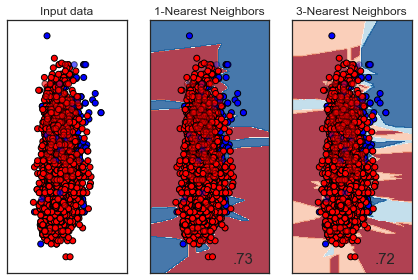

In [209]:
# Plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    print(xx.ravel(), yy.ravel())
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        #tmp = np.c_[xx.ravel(), yy.ravel()].reshape(1, -1)
        #Z = clf.predict_proba(tmp)[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.3)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

In [210]:
# Extra link: https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib